In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = []
for i in range(29):
    tempdf = pd.read_csv(f'data/User{i+1}.csv', delimiter = ',')
    tempdf['User'] = i
    files.append(tempdf)
df = pd.concat(files, ignore_index = True)

In [3]:
df

Game Completed Date      Team Outcome Task Completed  \
0      12/13/2020 at 1:26:56 am EST  Crewmate     Win              3   
1      12/13/2020 at 1:17:42 am EST  Crewmate    Loss              7   
2     12/13/2020 at 12:57:47 am EST  Crewmate     Win              3   
3     12/13/2020 at 12:41:55 am EST  Imposter     Win              -   
4     12/13/2020 at 12:30:37 am EST  Crewmate    Loss              4   
...                             ...       ...     ...            ...   
2222  12/01/2020 at 11:07:41 am EST  Imposter    Loss              -   
2223  12/01/2020 at 10:52:25 am EST  Crewmate     Win              7   
2224  11/26/2020 at 11:23:14 am EST  Crewmate     Win              7   
2225  11/26/2020 at 11:00:36 am EST  Crewmate     Win              7   
2226  11/26/2020 at 10:48:50 am EST  Crewmate     Win              7   

     All Tasks Completed Murdered Imposter Kills Game Length Ejected  \
0                     No      Yes              -     07m 04s      No   
1                    Yes       No              -     16m 21s      No   
2                     No       No              -     11m 33s      No   
3                      -        -              2     08m 05s      No   
4                     No       No              -     05m 10s      No   
...                  ...      ...            ...         ...     ...   
2222                   -        -              2     14m 10s      No   
2223                 Yes       No              -     14m 11s      No   
2224                 Yes       No              -     19m 45s      No   
2225                 Yes       No              -     10m 18s      No   
2226                 Yes       No              -     19m 37s      No   

      Sabotages Fixed Time to complete all tasks Rank Change Region/Game Code  \
0                 2.0                          -          ++      NA / WYMSBF   
1                 1.0                    09m 48s          --      NA / WYMSBF   
2                 0.0                          -          ++      NA / WYMSBF   
3                 NaN                          -         +++  Europe / QIRTNF   
4                 0.0                          -         ---  Europe / QIRTNF   
...               ...                        ...         ...              ...   
2222              NaN                          -           -      NA / SNNGZF   
2223              1.0                    14m 10s          ++      NA / SNNGZF   
2224              1.0                    15m 16s          ++  Europe / NZWLXQ   
2225              0.0                    06m 13s          ++  Europe / NZWLXQ   
2226              1.0                    16m 02s          ++  Europe / NZWLXQ   

      User  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
2222    28  
2223    28  
2224    28  
2225    28  
2226    28  

[2227 rows x 14 columns]

In [4]:
df.dtypes

Game Completed Date            object
Team                           object
Outcome                        object
Task Completed                 object
All Tasks Completed            object
Murdered                       object
Imposter Kills                 object
Game Length                    object
Ejected                        object
Sabotages Fixed               float64
Time to complete all tasks     object
Rank Change                    object
Region/Game Code               object
User                            int64
dtype: object

In [5]:
df[['Task Completed', 'Imposter Kills']] = df[['Task Completed', 'Imposter Kills']].apply(pd.to_numeric, errors = 'coerce')

In [6]:
df['Region'] = df['Region/Game Code'].str.extract(r'^(.*?)/')
df['Region'].value_counts()


NA         1436
Europe      791
Name: Region, dtype: int64

In [7]:
df['Game Length'] = df['Game Length'].apply(pd.to_timedelta)
df['Game Length'] = df['Game Length'] / np.timedelta64(1, 's')

In [8]:
df['Time to complete all tasks'] = df['Time to complete all tasks'].apply(pd.to_timedelta, errors = 'coerce')
df['Time to complete all tasks'] = df['Time to complete all tasks'] / np.timedelta64(1, 's')

In [9]:
crewmate = df[['Team',
               'Outcome',
               'Task Completed',
               'All Tasks Completed',
               'Murdered',
               'Game Length',
               'Ejected',
              'Sabotages Fixed',
              'Region',
              'User']][df['Team'] == 'Crewmate']
crewmate.head()

Team Outcome  Task Completed All Tasks Completed Murdered  Game Length  \
0  Crewmate     Win             3.0                  No      Yes        424.0   
1  Crewmate    Loss             7.0                 Yes       No        981.0   
2  Crewmate     Win             3.0                  No       No        693.0   
4  Crewmate    Loss             4.0                  No       No        310.0   
5  Crewmate    Loss             7.0                 Yes      Yes        982.0   

  Ejected  Sabotages Fixed   Region  User  
0      No              2.0      NA      0  
1      No              1.0      NA      0  
2      No              0.0      NA      0  
4      No              0.0  Europe      0  
5      No              0.0  Europe      0

In [10]:
crewmate['Outcome'] = crewmate['Outcome'].replace(['Loss', 'Win'],[0, 1])
crewmate['All Tasks Completed'] = crewmate['All Tasks Completed'].replace(['No', 'Yes'],[0, 1])
crewmate['Murdered'] = crewmate['Murdered'].replace(['No', 'Yes'],[0, 1])
crewmate['Ejected'] = crewmate['Ejected'].replace(['No', 'Yes'],[0, 1])
crewmate['Region'] = crewmate['Region'].replace(['NA ', 'Europe '],[0, 1])
crewmate.head()

Team  Outcome  Task Completed  All Tasks Completed  Murdered  \
0  Crewmate        1             3.0                    0         1   
1  Crewmate        0             7.0                    1         0   
2  Crewmate        1             3.0                    0         0   
4  Crewmate        0             4.0                    0         0   
5  Crewmate        0             7.0                    1         1   

   Game Length  Ejected  Sabotages Fixed  Region  User  
0        424.0        0              2.0       0     0  
1        981.0        0              1.0       0     0  
2        693.0        0              0.0       0     0  
4        310.0        0              0.0       1     0  
5        982.0        0              0.0       1     0

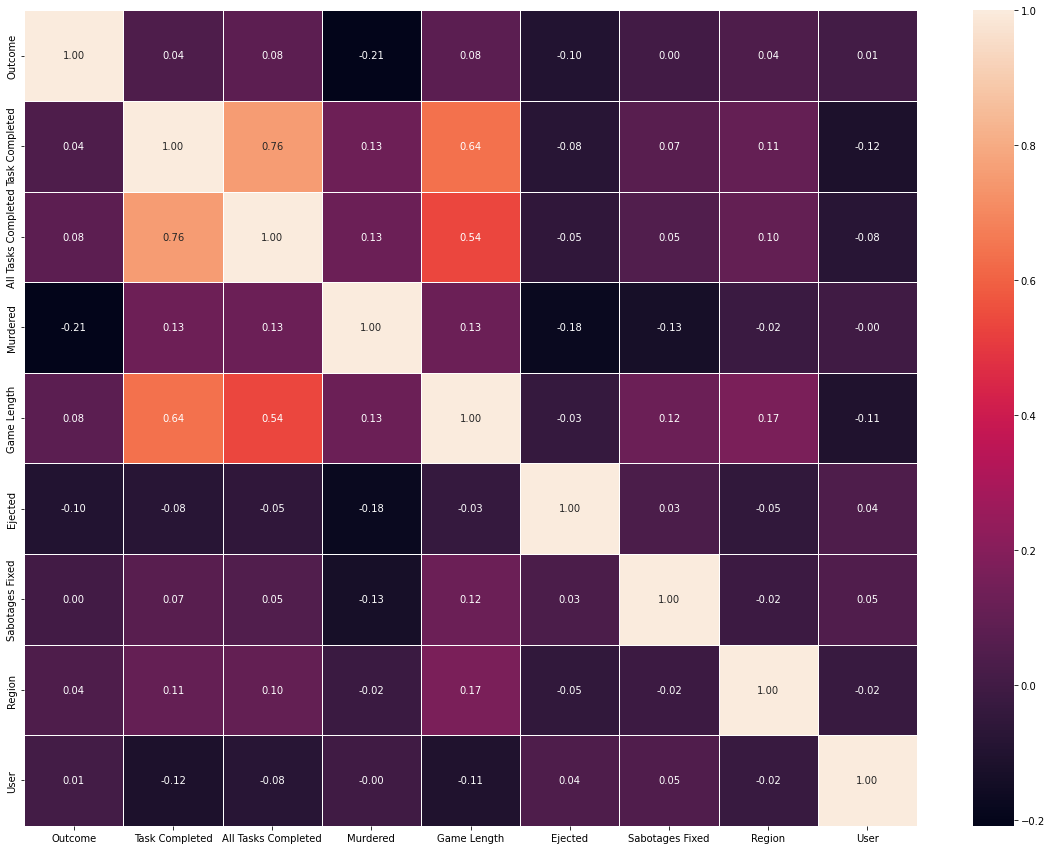

In [11]:
%matplotlib inline
corrlation_matrix = crewmate.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corrlation_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f")

In [12]:
crewmate = crewmate.drop(['All Tasks Completed'], axis =1)

In [13]:
crewmate.head()

Team  Outcome  Task Completed  Murdered  Game Length  Ejected  \
0  Crewmate        1             3.0         1        424.0        0   
1  Crewmate        0             7.0         0        981.0        0   
2  Crewmate        1             3.0         0        693.0        0   
4  Crewmate        0             4.0         0        310.0        0   
5  Crewmate        0             7.0         1        982.0        0   

   Sabotages Fixed  Region  User  
0              2.0       0     0  
1              1.0       0     0  
2              0.0       0     0  
4              0.0       1     0  
5              0.0       1     0

In [14]:
def user_train_valid_split(users_i,valid_ratio,possible=False):
    n = sum(users_i)
    target = int(np.floor(valid_ratio*n))
    while not possible:
        possible, validation_indices = user_split(users_i,target)
        target -= 1
    training_indices = [i for i in range(len(users_i)) if i not in validation_indices]
    return training_indices, validation_indices

def user_split(users_i,target):  
    # Reference: https://levelup.gitconnected.com/dynamic-programming-subset-sum-c386126621cd
    n = len(users_i)
    solution = [[False for j in range(int(target+1))] for i in range(n+1)]
    # base cases
    for i in range(n):
        solution[i][0] = True
    # other cases
    for i in range(1,n+1):
        for j in range(1,target+1):
            solution[i][j] = solution[i-1][j]
            if(solution[i][j] == False and j >= users_i[i-1]):
                solution[i][j] = solution[i][j] or solution[i-1][j-users_i[i-1]]
    # check if the subset sum is possible
    possible = solution[len(users_i)][target]
    subset = []
    if not possible: return possible, subset
    # return the subset solution if one exists
    y = len(users_i)
    x = target
    while x != 0:
        if solution[y-1][x] == False:
            subset.append(y-1)
            x -= users_i[y-1]
        else: 
            y -= 1
    return possible, subset

In [15]:
crewmates_i = list(crewmate["User"].value_counts(sort = False))
test_ratio = .25
training_indices, test_indices = user_train_valid_split(crewmates_i,test_ratio)

#check
train_sum = sum([crewmates_i[i] for i in training_indices])
test_sum = sum([crewmates_i[i] for i in test_indices])
print("expected valid ratio: {}, actual: {}".format(test_ratio, test_sum/(train_sum+test_sum)))

train_data = crewmate.loc[crewmate['User'].isin(training_indices)]
test_data = crewmate.loc[crewmate['User'].isin(test_indices)]
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

expected valid ratio: 0.25, actual: 0.2498580352072686


In [16]:
train_data

Team  Outcome  Task Completed  Murdered  Game Length  Ejected  \
0     Crewmate        1             3.0         1        424.0        0   
1     Crewmate        0             7.0         0        981.0        0   
2     Crewmate        1             3.0         0        693.0        0   
3     Crewmate        0             4.0         0        310.0        0   
4     Crewmate        0             7.0         1        982.0        0   
...        ...      ...             ...       ...          ...      ...   
1316  Crewmate        0             5.0         0        660.0        1   
1317  Crewmate        1             7.0         0        851.0        0   
1318  Crewmate        1             7.0         0       1185.0        0   
1319  Crewmate        1             7.0         0        618.0        0   
1320  Crewmate        1             7.0         0       1177.0        0   

      Sabotages Fixed  Region  User  
0                 2.0       0     0  
1                 1.0       0     0  
2                 0.0       0     0  
3                 0.0       1     0  
4                 0.0       1     0  
...               ...     ...   ...  
1316              2.0       1    28  
1317              1.0       0    28  
1318              1.0       1    28  
1319              0.0       1    28  
1320              1.0       1    28  

[1321 rows x 9 columns]

### Hypothesis Testing

In [95]:
from scipy import stats

avg_task_completed = crewmate.groupby(by = 'User')['Task Completed'].mean()
avg_wins = crewmate.groupby(by = 'User')['Outcome'].mean()

thresh = avg_task_completed.mean()
less_tasks = avg_wins[avg_task_completed < thresh]
greater_tasks = avg_wins[avg_task_completed >= thresh]
avg_task_completed = crewmate.groupby(by = 'User')['Task Completed'].mean()
avg_wins = crewmate.groupby(by = 'User')['Outcome'].mean()
thresh = avg_task_completed.mean()
less_tasks = avg_wins[avg_task_completed < thresh]
greater_tasks = avg_wins[avg_task_completed >= thresh]

t1, p1 = stats.ttest_ind(less_tasks, greater_tasks, alternative = 'less')
print(p1)
print(t1)

0.05237999155491819
-1.6786449499637606


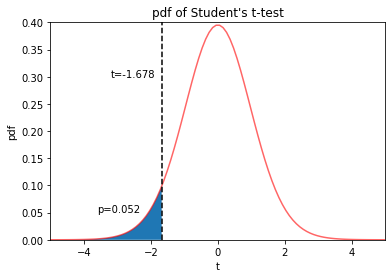

In [94]:
from scipy.stats import t
df = 27
fig = plt.figure()
x = np.linspace(t.ppf(0.00001, df),
                t.ppf(0.99999, df), 100)
plt.plot(x, t.pdf(x, df),'r-', alpha=0.6, label='t pdf')
plt.axvline(t1, color = 'black', ls = '--')
plt.xlabel('t')
plt.ylabel('pdf')
plt.title("pdf of Student's t-test")
plt.xlim(-5,5)
plt.ylim(0,.4)

def f(x):
    return t.pdf(x, 27)

section = np.linspace(-5,t1,100)
plt.fill_between(section,f(section))
plt.annotate('t=-1.678', (-3.2,.3))
plt.annotate('p=0.052', (-3.6,.05))

plt.show()

### Logistic Regression

<BarContainer object of 6 artists>

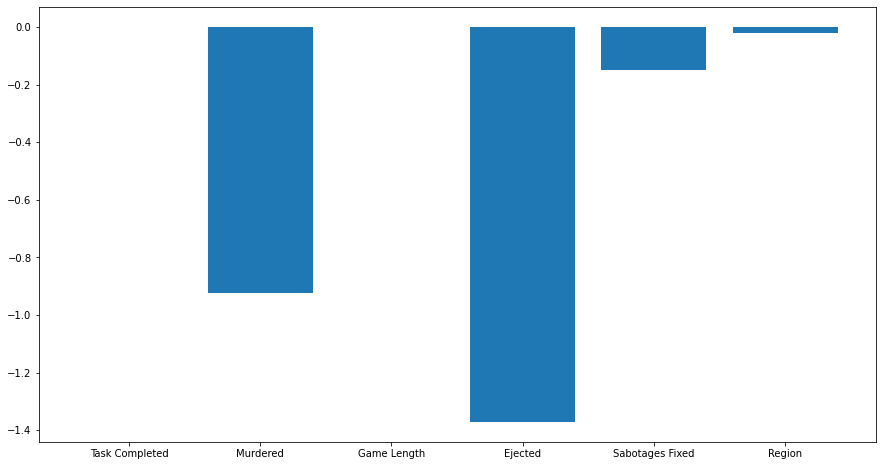

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#train data
X_train = train_data.drop(["Outcome", "Team", "User"], axis=1)
y_train = train_data["Outcome"]
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
coefs = clf.coef_[0]

plt.figure(figsize=(15,8))
plt.bar(X_train.columns, coefs)

In [93]:
# test data
X_test = test_data.drop(["Outcome", "Team", "User"], axis=1)
y_true = test_data["Outcome"]
y_predict = clf.predict(X_test)

auc = roc_auc_score(y_true, y_predict)
print("AUC:", auc)

AUC: 0.6136017272034544
